Using date as datetime index
Missing Values Handled!
Data Normalized!
Features Added!
                            p         T      Tpot      Tdew        rh  \
date                                                                    
2020-01-01 00:10:00  0.826640  0.173375  0.162785  0.363742  0.823694   
2020-01-01 00:20:00  0.824624  0.174345  0.163717  0.360536  0.812278   
2020-01-01 00:30:00  0.823073  0.173860  0.163484  0.359370  0.811010   
2020-01-01 00:40:00  0.822763  0.165131  0.155333  0.354707  0.826230   
2020-01-01 00:50:00  0.822298  0.164161  0.154401  0.358788  0.840183   

                        VPmax     VPact     VPdef        sh      H2OC  ...  \
date                                                                   ...   
2020-01-01 00:10:00  0.051252  0.156321  0.021140  0.150355  0.151515  ...   
2020-01-01 00:20:00  0.051638  0.154055  0.022565  0.148227  0.149733  ...   
2020-01-01 00:30:00  0.051445  0.153602  0.022803  0.148227  0.148841  ...   
2020-01-01 0

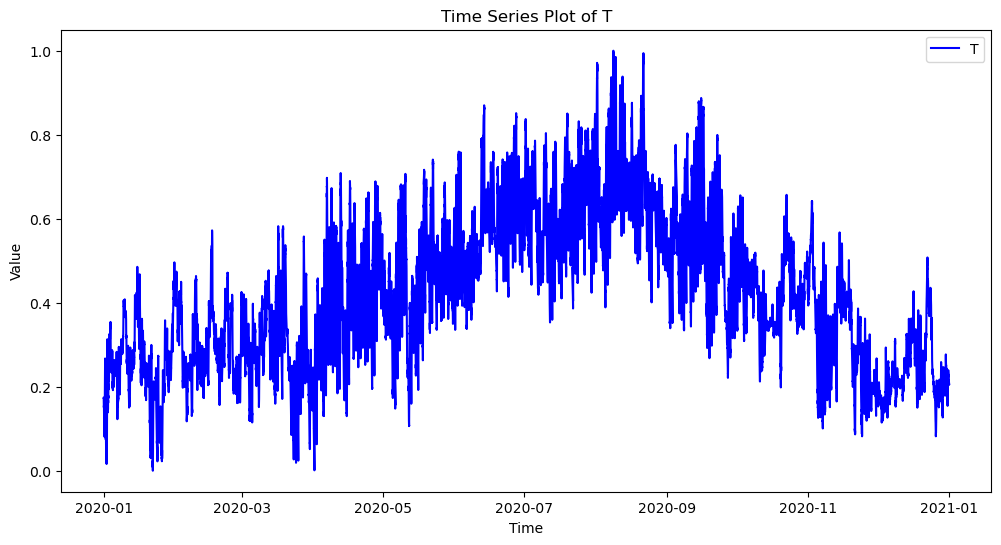

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data():
    """Loads the dataset with datetime index."""
    # Replace with your actual file path
    df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')
    print("Using date as datetime index")
    return df

def clean_data(df):
    """Handles missing values properly."""
    df = df.ffill().bfill()  # Forward and backward fill
    df.dropna(inplace=True)  # Ensure no NaN values remain
    print("Missing Values Handled!")
    return df

def normalize_data(df):
    """Normalizes the data using Min-Max Scaling."""
    df = (df - df.min()) / (df.max() - df.min())
    print("Data Normalized!")
    return df

def add_features(df):
    """Adds useful time-based features."""
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    print("Features Added!")
    return df

def visualize_data(df, column='T'):
    """Plots a time-series visualization of the given column."""
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in dataset. Available columns: {df.columns}")
        return

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df[column], label=column, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Time Series Plot of {column}')
    plt.legend()
    plt.show()

def main():
    df = load_data()
    df = clean_data(df)
    df = normalize_data(df)
    df = add_features(df)
    
    print(df.head())  # Display the first few rows
    
    # Check if 'T' exists before visualization
    visualize_data(df, 'T')

if __name__ == "__main__":
    main()
